# Introduction to Simple linear regression in machine learning using python3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
!pip install scikit-learn

In [2]:
# Data loading
DF = pd.read_csv(r"C:\Users\excel\PycharmProjects\Marks_predictor\student_info.csv")
DF

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
# Data types
DF.dtypes

study_hours      float64
student_marks    float64
dtype: object

In [4]:
# missing values
DF.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [5]:
DF['study_hours'] = DF['study_hours'].fillna(DF['study_hours'].mean())

In [6]:
# check missing values
DF.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [7]:
x = pd.DataFrame(DF['study_hours'])
y = DF['student_marks']

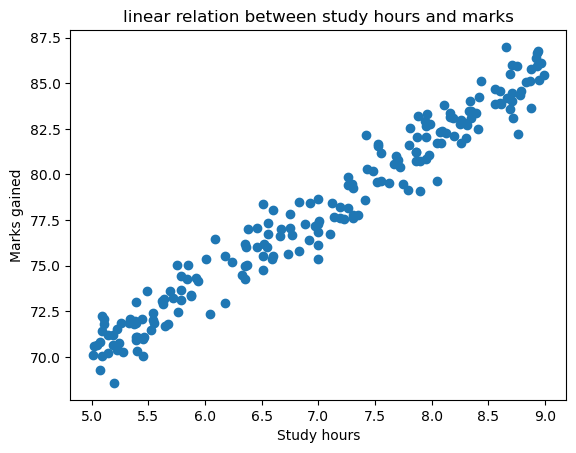

In [8]:
# linear relation between study hours and marks
plt.scatter(x,y)
plt.title('linear relation between study hours and marks')
plt.xlabel('Study hours')
plt.ylabel('Marks gained')
plt.show()

In [11]:
x.shape,y.shape

((200, 1), (200,))

In [9]:
# correlation between the marks and study hours
r = x['study_hours'].corr(y)
print(r)

0.9786955883159014


In [10]:
# simple linear regression equation
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [11]:
# r_square 
model.score(x,y)

0.957845054589008

In [12]:
x.min(),x.max()

(study_hours    5.01
 dtype: float64,
 study_hours    8.99
 dtype: float64)

In [19]:
# prediction the user input value
hours = int(input("Please enter the study hours: "))

if hours >0 and hours<=10:
    predicted_marks = round(model.predict([[hours]])[0],2)
    print(predicted_marks)
else:
    print("please enter the values between 1h to 10h")

Please enter the study hours: 6
74.05


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# prediction on y values
y_pred = model.predict(x).round(2)
y_pred

array([77.29, 76.24, 77.93, 72.77, 84.46, 80.09, 76.66, 85.7 , 70.9 ,
       76.98, 76.35, 84.03, 80.87, 81.46, 82.59, 76.2 , 75.46, 83.56,
       83.44, 80.56, 79.59, 82.47, 70.35, 73.47, 71.91, 81.69, 76.04,
       76.9 , 73.82, 79.82, 82.35, 77.93, 71.72, 84.89, 84.65, 78.34,
       81.3 , 78.69, 72.57, 81.38, 71.25, 85.43, 71.95, 83.01, 82.2 ,
       74.75, 77.99, 70.2 , 72.26, 70.51, 70.51, 79.16, 84.61, 72.18,
       84.81, 84.53, 73.08, 85.47, 71.68, 72.69, 72.07, 78.96, 75.42,
       80.75, 85.27, 71.91, 81.3 , 82.86, 70.43, 82.82, 71.6 , 70.59,
       75.42, 79.55, 79.16, 74.21, 70.59, 76.24, 70.51, 73.59, 83.17,
       81.61, 76.62, 74.09, 77.48, 72.61, 73.59, 82.04, 71.44, 84.92,
       79.98, 82.63, 71.87, 81.46, 80.64, 74.4 , 77.93, 70.94, 85.27,
       82.12, 74.99, 81.65, 82.86, 79.16, 78.85, 75.85, 71.48, 72.96,
       73.43, 70.23, 81.77, 75.49, 77.64, 81.65, 78.42, 73.23, 71.72,
       85.08, 72.85, 76.39, 76.08, 83.05, 77.93, 80.37, 84.53, 84.77,
       75.85, 78.5 ,

In [22]:
# r2_score
r2_score(y_pred, y)

0.9559849895268727

In [24]:
result_pred = pd.DataFrame({'Actual_marks':y,
                           'Predicted_marks':y_pred,
                           'Residuals':y-y_pred,
                           'Error_sum':(y-y_pred)**2})
print(result_pred)
result_pred['Error_sum'].sum()

     Actual_marks  Predicted_marks  Residuals  Error_sum
0           78.50            77.29       1.21     1.4641
1           76.74            76.24       0.50     0.2500
2           78.68            77.93       0.75     0.5625
3           71.82            72.77      -0.95     0.9025
4           84.19            84.46      -0.27     0.0729
..            ...              ...        ...        ...
195         81.67            80.01       1.66     2.7556
196         84.68            84.03       0.65     0.4225
197         86.75            85.51       1.24     1.5376
198         78.05            76.39       1.66     2.7556
199         83.50            83.21       0.29     0.0841

[200 rows x 4 columns]


203.5265000000002

<Axes: >

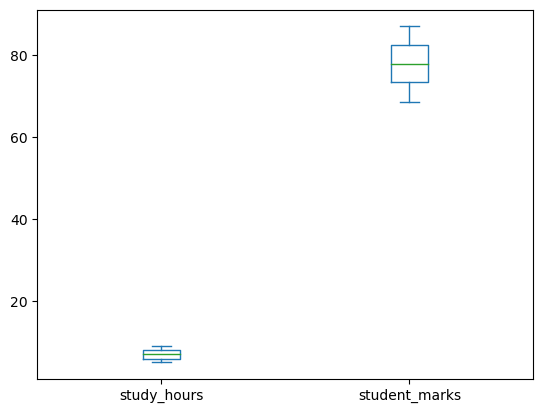

In [25]:
# checking for outliers
DF.plot(kind = 'box')

<Axes: ylabel='Density'>

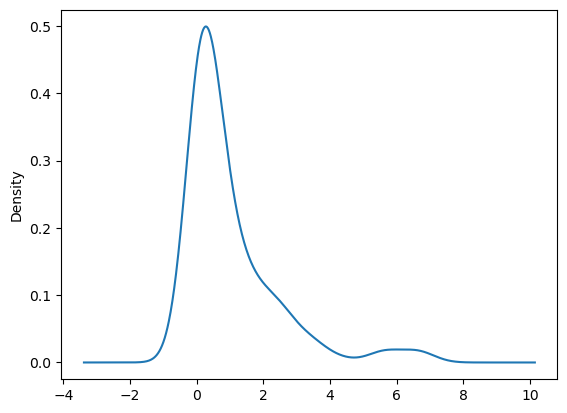

In [27]:
result_pred['Error_sum'].plot(kind = 'kde')

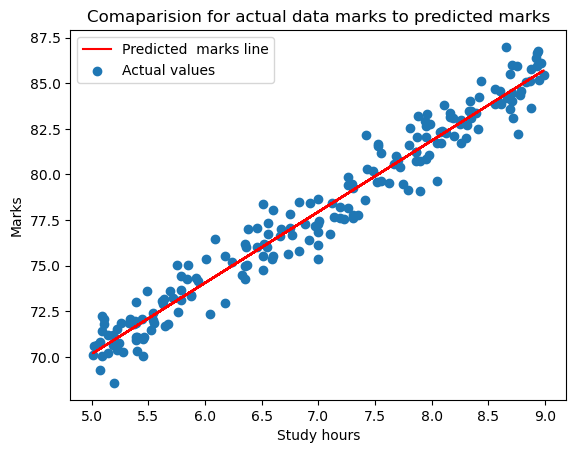

In [28]:
plt.plot(x['study_hours'],result_pred['Predicted_marks'],c = 'r',label = 'Predicted  marks line')
plt.scatter(x,y,label = 'Actual values')
plt.title('Comaparision for actual data marks to predicted marks')
plt.legend()
plt.xlabel('Study hours')
plt.ylabel('Marks')
plt.show()

# polynomial regression 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

In [36]:
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
print(mtcars.head())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


In [37]:
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [39]:
x = mtcars.drop(['mpg'],axis = 1)
x.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
# correlation for every pair of variables
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [41]:
mtcars['mpg'].corr(mtcars['wt'])

-0.8676593765172281

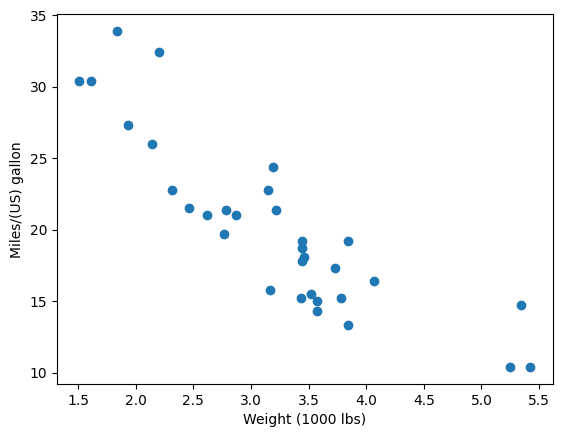

In [53]:
# relation between wight and milage of vehicle.
plt.scatter(mtcars['wt'],mtcars['mpg'])
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('Miles/(US) gallon')
plt.show()

In [67]:
# Initialize model
y = mtcars['mpg']
# Make a DataFrame of predictor variables
predictors_X = pd.DataFrame([mtcars["wt"],           
                            mtcars["wt"]**2,
                             mtcars["wt"]**3,           
                            ]).T     # Include weight squared, .T --> transpose( columnwise to rowise)
predictors_X

,wt,wt,wt
0,2.620,6.864400,17.984728
1,2.875,8.265625,23.763672
2,2.320,5.382400,12.487168
3,3.215,10.336225,33.230963
4,3.440,11.833600,40.707584
5,3.460,11.971600,41.421736
6,3.570,12.744900,45.499293
7,3.190,10.176100,32.461759
8,3.150,9.922500,31.255875
9,3.440,11.833600,40.707584


In [68]:
# Train the model using the new_cars data
poly_model = LinearRegression()
poly_model.fit(X = predictors_X, y = y)
# Check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)
# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: ", poly_model.coef_)
# Check R-squared
print("Model Accuracy:", poly_model.score(X = predictors_X, y = mtcars["mpg"]))

Model intercept:  48.40369622795221
Model Coefficients:  [-11.82597602   0.68937919   0.04593618]
Model Accuracy: 0.8191284628478992


C:\Users\excel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


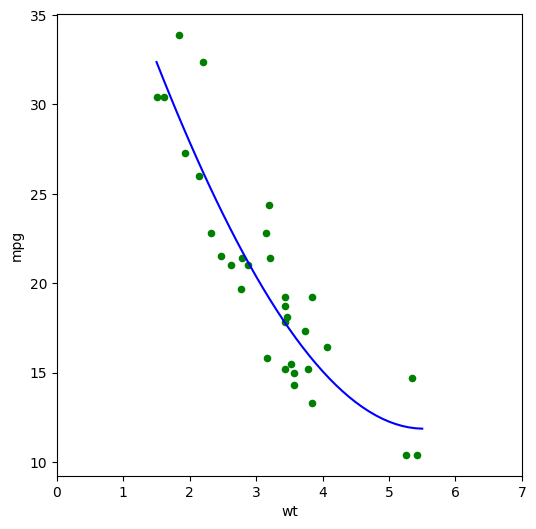

In [70]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.6, 0.1)
# poly_line_range
# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                                poly_line_range**2, 
                               poly_line_range**3,
                            ]).T                           
# # print(poly_predictors)
# # Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)
mtcars.plot(kind="scatter",x="wt",y="mpg",figsize=(6,6),color="Green",xlim = (0,7))
# Plot curve line
plt.plot(poly_line_range,y_values,color="blue");